## Modelo Multinomial con las variables que sobrevivieron al Anova y la prueba Tukey

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [4]:
# Cargar el archivo Excel
SCA = pd.read_excel("/home/camilo/Documentos/Doctorado en Matemática/TrabajoCruzCarreto/ArticuloMultinomialSCA2/Base de datos COMPLETA 230822.xls", sheet_name = "GRUPO ENFERMOS")
Control = pd.read_excel("/home/camilo/Documentos/Doctorado en Matemática/TrabajoCruzCarreto/ArticuloMultinomialSCA2/Base de datos COMPLETA 230822.xls", sheet_name = "Grupo de Control")
Preclinics = pd.read_excel("/home/camilo/Documentos/Doctorado en Matemática/TrabajoCruzCarreto/ArticuloMultinomialSCA2/Base de datos COMPLETA 230822.xls", sheet_name = "GRUPO PRECLINICOS")

In [5]:
#Preprosesamiento
# Crear una nueva columna 'padecimiento' con el valor "E" repetido para todas las filas
SCA['padecimiento'] = np.repeat("E", SCA.shape[0])
Control['padecimiento'] = np.repeat("C", Control.shape[0])
Preclinics['padecimiento'] = np.repeat("P", Preclinics.shape[0])

In [6]:
# Filtrar el DataFrame SCA donde las columnas 'DAPMES', 'Columna2', 'Columna3' no tengan valores nulos
SCA_l = SCA.dropna(subset=['DAPMES', 'DAPM', 'DAPIV'])

# Filtrar el DataFrame Control donde las columnas 'DAPMES', 'Columna2', 'Columna3' no tengan valores nulos
Control_l = Control.dropna(subset=['DAPMES', 'DAPM', 'DAPIV'])

# Filtrar el DataFrame Preclinicos donde las columnas 'DAPMES', 'Columna2', 'Columna3' no tengan valores nulos
Preclinics_l = Preclinics.dropna(subset=['DAPMES', 'DAPM', 'DAPIV'])

In [7]:
# Crear una lista de IDs en tu DataFrame SCA_l
id_SCA_l = np.arange(len(SCA_l))

# Seleccionar 13 IDs aleatorios sin reemplazo
ID_test = np.random.choice(id_SCA_l, 13, replace=False)

# Crear el conjunto de prueba utilizando los IDs seleccionados
SCA_l_test = SCA_l.iloc[ID_test]

# Crear el conjunto de entrenamiento excluyendo los índices seleccionados
SCA_l_train = SCA_l.drop(SCA_l.index[ID_test])

In [8]:
# Crear una lista de IDs en tu DataFrame Control_l
id_Control_l = np.arange(len(Control_l))

# Seleccionar 14 IDs aleatorios sin reemplazo
ID_test = np.random.choice(id_Control_l, 14, replace=False)

# Crear el conjunto de prueba utilizando los IDs seleccionados
Control_l_test = Control_l.iloc[ID_test]

# Crear el conjunto de entrenamiento excluyendo los índices seleccionados
Control_l_train = Control_l.drop(Control_l.index[ID_test])


In [9]:
# Crear una lista de IDs en tu DataFrame Control_l
id_Preclinics_l = np.arange(len(Preclinics_l))

# Seleccionar 14 IDs aleatorios sin reemplazo
ID_test = np.random.choice(id_Preclinics_l, 4, replace=False)

# Crear el conjunto de prueba utilizando los IDs seleccionados
Preclinics_l_test = Preclinics_l.iloc[ID_test]

# Crear el conjunto de entrenamiento excluyendo los índices seleccionados
Preclinics_l_train = Preclinics_l.drop(Preclinics_l.index[ID_test])

In [10]:
# Y los DataFrames correspondientes para test: SCA_l_test, Preclinicos_l_test, Control_l_test

# Merge para el conjunto de entrenamiento
dataset_train = pd.merge(SCA_l_train, Preclinics_l_train, how='outer')
dataset_train = pd.merge(dataset_train, Control_l_train, how='outer')

# Mostrar el conjunto de entrenamiento combinado
print("Conjunto de entrenamiento combinado:")
print(dataset_train)

# Merge para el conjunto de prueba
dataset_test = pd.merge(SCA_l_test, Preclinics_l_test, how='outer')
dataset_test = pd.merge(dataset_test, Control_l_test, how='outer')

dataset_full = pd.merge(dataset_train, dataset_test, how='outer')

Conjunto de entrenamiento combinado:
              No Nombres y Apellidos / IRM No? Sexo  Edad Edad.1 Tiempo  \
0    IIRM22-1693                           NaN    M  35.0    NaN    NaN   
1     IRM21-1859        MARTIN INFANTE^MIRTHA^    F  70.0     60     10   
2      IRM21-186       Nelson Alonso Velázquez    M  45.0     40      5   
3     IRM21-1891                           NaN    M  28.0    NaN    NaN   
4      IRM21-292          Nelvis Pérez Sánchez    F  34.0     24     10   
..           ...                           ...  ...   ...    ...    ...   
118    IRM22-944     OSORIO RAMIREZ^MAGDIEL^^^    M  25.0     17      8   
119    IRM22-945      BRUSETAS RIVAS^GLADIS^^^    F  62.0     47     15   
120    IRM22-946      RIVAS MEDINA^LOURDES ^^^    F  47.0     43      4   
121     IRM22-95          NORAIDA SOLIS GARCIA    F  43.0     42      1   
122    IRM22-980        MORENO TORRES^PEDRO^^^    M  64.0     58      8   

                 SARA                                Fenotipo 

In [11]:
dataset_full=dataset_full[['DAPMES','DAPM','DAPIV','padecimiento']]
dataset_full.head()

,DAPMES,DAPM,DAPIV,padecimiento
0,19.10,6.72,8.15,C
1,19.17,7.70,12.12,C
2,15.74,6.09,14.48,E
3,17.97,5.80,1.08,E
4,17.20,6.28,6.89,E


In [12]:
dataset_full.max()

DAPMES          22.57
DAPM             9.76
DAPIV           18.85
padecimiento        P
dtype: object

### Modelo Multinomial con las variables sobrevivientes 

In [13]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset_full,test_size=0.2)
trainx=train[['DAPMES','DAPM','DAPIV']] 
trainy=train['padecimiento']
testx=test[['DAPMES','DAPM','DAPIV']]
testy=test['padecimiento']

In [14]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=1000,multi_class="multinomial").fit(trainx,trainy)

/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [15]:
# Ver los coeficientes (parámetros) del modelo
coeficientes = LR.coef_
interceptos = LR.intercept_

print("Coeficientes del modelo:\n", coeficientes)
print("Interceptos del modelo:\n", interceptos)

Coeficientes del modelo:
 [[ 1.20997029  0.51402227  0.03717288]
 [-0.90457891 -0.558564    0.07668941]
 [-0.30539138  0.04454173 -0.11386229]]
Interceptos del modelo:
 [-25.38822732  19.07808344   6.31014388]


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(testy,LR.predict(testx))

array([[10,  4,  0],
       [ 0, 16,  1],
       [ 0,  0,  0]])

In [17]:
confusion_matrix(trainy,LR.predict(trainx))

array([[56,  1,  1],
       [ 2, 45,  1],
       [ 7,  7,  3]])

## USANDO VALIDACIÓN CRUZADA

In [18]:
# Observación
conteopadecimiento=dataset_full['padecimiento'].value_counts()
print(conteopadecimiento)

padecimiento
C    72
E    65
P    17
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# Suponiendo que 'dataset_full' es tu DataFrame completo
# Primero, dividimos los datos en un conjunto de entrenamiento y prueba
train, test = train_test_split(dataset_full, test_size=0.2, random_state=42)

# Seleccionamos las características (X) y la variable objetivo (y)
trainx = train[['DAPMES','DAPM','DAPIV']]
trainy = train['padecimiento']

# Configuramos el número de splits para K-Folds
k = 2  # Puedes ajustar este valor según tus necesidades
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inicializamos un modelo de regresión logística (o cualquier otro modelo)
model = LogisticRegression(max_iter=2000, multi_class="multinomial")

# Almacenamos los resultados de la validación
scores = []

# Aplicamos K-Folds
for train_index, val_index in kf.split(trainx):
    X_train, X_val = trainx.iloc[train_index], trainx.iloc[val_index]
    y_train, y_val = trainy.iloc[train_index], trainy.iloc[val_index]
    
    # Entrenamos el modelo
    model.fit(X_train, y_train)
    
    # Evaluamos el modelo (puedes usar otras métricas o métodos de evaluación)
    score = model.score(X_val, y_val)  # Por ejemplo, precisión
    scores.append(score)

# Imprimimos los resultados
print("Precisión en cada fold:", scores)
print("Precisión media:", np.mean(scores))

Precisión en cada fold: [0.7741935483870968, 0.8360655737704918]
Precisión media: 0.8051295610787943


/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [20]:
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Suponiendo que 'dataset_full' es tu DataFrame completo
# Primero, dividimos los datos en un conjunto de entrenamiento y prueba
train, test = train_test_split(dataset_full, test_size=0.2, random_state=42)

# Seleccionamos las características (X) y la variable objetivo (y)
trainx = train[['DAPMES',  'DAPM','DAPIV']]
trainy = train['padecimiento']

# Configuramos Repeated K-Fold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Inicializamos un modelo de regresión logística
model = LogisticRegression(max_iter=1000, multi_class="multinomial")

# Almacenamos los resultados de la validación
y_true = []
y_pred = []

# Aplicamos Repeated K-Fold
for train_index, val_index in rkf.split(trainx):
    X_train, X_val = trainx.iloc[train_index], trainx.iloc[val_index]
    y_train, y_val = trainy.iloc[train_index], trainy.iloc[val_index]
    
    # Entrenamos el modelo
    model.fit(X_train, y_train)
    
    # Predecimos las etiquetas para el conjunto de validación
    predictions = model.predict(X_val)
    
    # Almacenamos las predicciones y las verdaderas etiquetas
    y_true.extend(y_val)
    y_pred.extend(predictions)

# Convertimos a numpy arrays para usar en la matriz de confusión
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Creamos la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Imprimimos la matriz de confusión y el reporte de clasificación
print("Matriz de Confusión:\n", conf_matrix)
print("Precisión total:", accuracy_score(y_true, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_true, y_pred))

/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/s

/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/s

Matriz de Confusión:
 [[515  40   5]
 [ 20 483  17]
 [ 71  74   5]]
Precisión total: 0.8154471544715447

Reporte de Clasificación:
               precision    recall  f1-score   support

           C       0.85      0.92      0.88       560
           E       0.81      0.93      0.86       520
           P       0.19      0.03      0.06       150

    accuracy                           0.82      1230
   macro avg       0.61      0.63      0.60      1230
weighted avg       0.75      0.82      0.77      1230



/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/camilo/Documentos/scikit-learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## K-means para clusterizar a ver que va a pasar con esas mediciones 


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
dataset_full.head()

,DAPMES,DAPM,DAPIV,padecimiento
0,19.10,6.72,8.15,C
1,19.17,7.70,12.12,C
2,15.74,6.09,14.48,E
3,17.97,5.80,1.08,E
4,17.20,6.28,6.89,E


In [26]:


# Cargar los datos
# Suponiendo que el DataFrame se llama 'df' y contiene las columnas DAPMES, DAPP y DAPM
# df = pd.read_csv('ruta_a_tu_archivo.csv')  # Usa esta línea si los datos están en un archivo CSV

# Seleccionar las columnas de interés
X = dataset_full[['DAPMES', 'DAPIV', 'DAPM']]

# Escalar los datos para que cada característica tenga media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el algoritmo k-means con k=3 (tres clusters: preclínicos, control, y enfermos)
kmeans = KMeans(n_clusters=3, random_state=0)
dataset_full['cluster'] = kmeans.fit_predict(X_scaled)

# Ver los resultados
print(dataset_full[['DAPMES', 'DAPIV', 'DAPM', 'cluster','padecimiento']])

     DAPMES  DAPIV  DAPM  cluster padecimiento
0     19.10   8.15  6.72        0            C
1     19.17  12.12  7.70        0            C
2     15.74  14.48  6.09        1            E
3     17.97   1.08  5.80        2            E
4     17.20   6.89  6.28        2            E
..      ...    ...   ...      ...          ...
149   16.22  13.81  5.31        1            E
150   15.42   8.88  5.32        2            E
151   15.92  10.32  4.85        2            E
152   15.45  10.19  5.99        2            E
153   15.57  15.42  6.35        1            E

[154 rows x 5 columns]


In [28]:
print(dataset_full)

     DAPMES  DAPM  DAPIV padecimiento  cluster
0     19.10  6.72   8.15            C        0
1     19.17  7.70  12.12            C        0
2     15.74  6.09  14.48            E        1
3     17.97  5.80   1.08            E        2
4     17.20  6.28   6.89            E        2
..      ...   ...    ...          ...      ...
149   16.22  5.31  13.81            E        1
150   15.42  5.32   8.88            E        2
151   15.92  4.85  10.32            E        2
152   15.45  5.99  10.19            E        2
153   15.57  6.35  15.42            E        1

[154 rows x 5 columns]


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

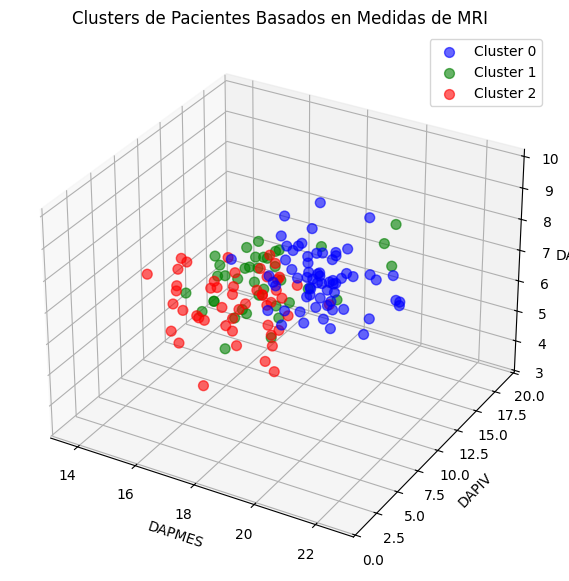

In [31]:
# Visualización en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Colores para cada cluster
colors = ['blue', 'green', 'red']
for cluster in range(3):
    cluster_data = dataset_full[dataset_full['cluster'] == cluster]
    ax.scatter(
        cluster_data['DAPMES'], 
        cluster_data['DAPIV'], 
        cluster_data['DAPM'], 
        label=f'Cluster {cluster}', 
        color=colors[cluster], 
        s=50, 
        alpha=0.6
    )

# Etiquetas y título
ax.set_xlabel('DAPMES')
ax.set_ylabel('DAPIV')
ax.set_zlabel('DAPM')
plt.title('Clusters de Pacientes Basados en Medidas de MRI')
plt.legend()
plt.show()

## matriz de confusion

In [32]:
y_true = dataset_full['padecimiento']  # Asegúrate de que esta columna tenga las etiquetas reales

y_pred = dataset_full['cluster']

# 1. Matriz de Confusión
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'], yticklabels=['Preclínico', 'Control', 'Enfermo'])
plt.xlabel("Cluster Asignado por k-means")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

ValueError: Mix of label input types (string and number)

In [33]:
y_pred.shape


(154,)